 # Online Retail Analysis
 
- [This](https://www.dropbox.com/s/uwdf1j6g8njrzvq/Online_Retail_dataset.zip?dl=0) is the link of the dataset used in this analysis part.

- This dataset contains 541909 samples with 8 features each.

- In this notebook file we tried to perform an analysis to understand it's customer.Such analysis can help a buisness to scale and to take appropriate decision.

In this analysis we find out that november, 2011 is the month of largest revenue and in this month maximum number of items were sold.Then we find out the Correlation Matrix to understand the correlation among the different features.
This analysis along with Apriori analysis can be usefull to build a strong Recommendation System which can be very usefull to increase the revenue.Further we can can cluster the customers according to the items they bought.We can also cluster the most frequent items 

In [2]:
!wget https://www.dropbox.com/s/uwdf1j6g8njrzvq/Online_Retail_dataset.zip?dl=0

--2020-06-13 10:04:39--  https://www.dropbox.com/s/uwdf1j6g8njrzvq/Online_Retail_dataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.67.1, 2620:100:6023:1::a27d:4301
Connecting to www.dropbox.com (www.dropbox.com)|162.125.67.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/uwdf1j6g8njrzvq/Online_Retail_dataset.zip [following]
--2020-06-13 10:04:39--  https://www.dropbox.com/s/raw/uwdf1j6g8njrzvq/Online_Retail_dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc43824f61f974effd028e279910.dl.dropboxusercontent.com/cd/0/inline/A5kPnJac-Q9yMT5N29e5XUhkoJnVTsfV0WtNx7QOI8Bk0enpXuQVmgECzuwhoehYorNONAqR9epOnGnN-xDnW00DyUBm9s1MWK75Vic-oYBE0EQhZzXmhSTLlcc6NuDNC6Y/file# [following]
--2020-06-13 10:04:40--  https://uc43824f61f974effd028e279910.dl.dropboxusercontent.com/cd/0/inline/A5kPnJac-Q9yMT5N29e5XUhkoJnVTsfV0WtNx7QOI8Bk0enpXuQVmgECzuwhoehYorN

In [3]:
!unzip Online_Retail_dataset.zip?dl=0

Archive:  Online_Retail_dataset.zip?dl=0
  inflating: data.csv                


In [0]:
## importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
data = pd.read_csv('data.csv')

In [147]:
data.shape

(541909, 8)

In [148]:
data.head(n=10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/10 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/10 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/10 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/10 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/10 08:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,01/12/10 08:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,01/12/10 08:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,01/12/10 08:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,01/12/10 08:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,01/12/10 08:34,1.69,13047.0,United Kingdom


In [149]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [151]:
data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [152]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [153]:
data['Description'].unique().shape     ## so these are the total unique items in the dataset

(4224,)

In [154]:
data['Country'].unique().shape         ## there are 38 countries

(38,)

### separating date, month and year

In [0]:
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"]).dt.date

In [156]:
data.head(n=10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-01-12,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-01-12,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-01-12,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-01-12,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-01-12,1.69,13047.0,United Kingdom


In [0]:
data["InvoiceMonth"] = pd.DatetimeIndex(data["InvoiceDate"]).month


In [158]:
data.head(n=10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12,2.55,17850.0,United Kingdom,1
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12,3.39,17850.0,United Kingdom,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12,2.75,17850.0,United Kingdom,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12,3.39,17850.0,United Kingdom,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12,3.39,17850.0,United Kingdom,1
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-01-12,7.65,17850.0,United Kingdom,1
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-01-12,4.25,17850.0,United Kingdom,1
7,536366,22633,HAND WARMER UNION JACK,6,2010-01-12,1.85,17850.0,United Kingdom,1
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-01-12,1.85,17850.0,United Kingdom,1
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-01-12,1.69,13047.0,United Kingdom,1


In [0]:
data["InvoiceYear"] = pd.DatetimeIndex(data["InvoiceDate"]).year

In [160]:
data.head(n=10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,InvoiceYear
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12,2.55,17850.0,United Kingdom,1,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12,3.39,17850.0,United Kingdom,1,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12,2.75,17850.0,United Kingdom,1,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12,3.39,17850.0,United Kingdom,1,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12,3.39,17850.0,United Kingdom,1,2010
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-01-12,7.65,17850.0,United Kingdom,1,2010
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-01-12,4.25,17850.0,United Kingdom,1,2010
7,536366,22633,HAND WARMER UNION JACK,6,2010-01-12,1.85,17850.0,United Kingdom,1,2010
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-01-12,1.85,17850.0,United Kingdom,1,2010
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-01-12,1.69,13047.0,United Kingdom,1,2010


In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   InvoiceNo     541909 non-null  object 
 1   StockCode     541909 non-null  object 
 2   Description   540455 non-null  object 
 3   Quantity      541909 non-null  int64  
 4   InvoiceDate   541909 non-null  object 
 5   UnitPrice     541909 non-null  float64
 6   CustomerID    406829 non-null  float64
 7   Country       541909 non-null  object 
 8   InvoiceMonth  541909 non-null  int64  
 9   InvoiceYear   541909 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 41.3+ MB


In [162]:
data.describe()

,Quantity,UnitPrice,CustomerID,InvoiceMonth,InvoiceYear
count,541909.000000,541909.000000,406829.000000,541909.000000,541909.000000
mean,9.552250,4.611114,15287.690570,6.919828,2010.921609
std,218.081158,96.759853,1713.600303,3.363659,0.268787
min,-80995.000000,-11062.060000,12346.000000,1.000000,2010.000000
25%,1.000000,1.250000,13953.000000,4.000000,2011.000000
50%,3.000000,2.080000,15152.000000,7.000000,2011.000000
75%,10.000000,4.130000,16791.000000,10.000000,2011.000000
max,80995.000000,38970.000000,18287.000000,12.000000,2011.000000


### Finding Revenue

In [0]:
data["Revenue"]=data["UnitPrice"]*data["Quantity"]

In [164]:
data.head(n=10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,InvoiceYear,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12,2.55,17850.0,United Kingdom,1,2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12,3.39,17850.0,United Kingdom,1,2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12,2.75,17850.0,United Kingdom,1,2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12,3.39,17850.0,United Kingdom,1,2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12,3.39,17850.0,United Kingdom,1,2010,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-01-12,7.65,17850.0,United Kingdom,1,2010,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-01-12,4.25,17850.0,United Kingdom,1,2010,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-01-12,1.85,17850.0,United Kingdom,1,2010,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-01-12,1.85,17850.0,United Kingdom,1,2010,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-01-12,1.69,13047.0,United Kingdom,1,2010,54.08


In [165]:
data.describe()

,Quantity,UnitPrice,CustomerID,InvoiceMonth,InvoiceYear,Revenue
count,541909.000000,541909.000000,406829.000000,541909.000000,541909.000000,541909.000000
mean,9.552250,4.611114,15287.690570,6.919828,2010.921609,17.987795
std,218.081158,96.759853,1713.600303,3.363659,0.268787,378.810824
min,-80995.000000,-11062.060000,12346.000000,1.000000,2010.000000,-168469.600000
25%,1.000000,1.250000,13953.000000,4.000000,2011.000000,3.400000
50%,3.000000,2.080000,15152.000000,7.000000,2011.000000,9.750000
75%,10.000000,4.130000,16791.000000,10.000000,2011.000000,17.400000
max,80995.000000,38970.000000,18287.000000,12.000000,2011.000000,168469.600000


In [166]:
data["InvoiceYear"].unique()

array([2010, 2011])

In [167]:
data["InvoiceMonth"].unique()

array([ 1,  2,  3,  5,  6,  7,  8,  9, 10, 12,  4, 11])

In [168]:
data[data["InvoiceYear"]==2011]["InvoiceMonth"].unique()   ## so decemeber 2011 is the last month of purchase

array([ 4,  5,  6,  7,  9, 10, 11, 12,  1,  2,  3,  8])

In [169]:
data[data["InvoiceYear"]==2010]["InvoiceMonth"].unique()

array([ 1,  2,  3,  5,  6,  7,  8,  9, 10, 12])

## Monthly Revenue Overview

Text(0, 0.5, 'Revenue')

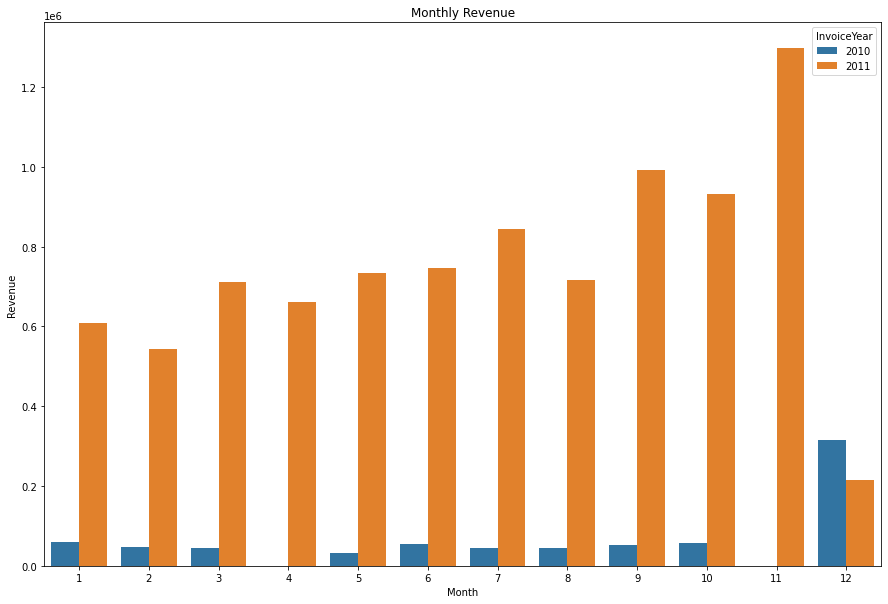

In [170]:

data_revenue=data.groupby(["InvoiceMonth", "InvoiceYear"])["Revenue"].sum().reset_index()
plt.figure(figsize=(15,10))
sns.barplot(x="InvoiceMonth", y="Revenue", hue="InvoiceYear", data=data_revenue)
plt.title("Monthly Revenue")
plt.xlabel("Month")
plt.ylabel("Revenue")

In [0]:
## so in november 2011 is the month of largest revenue

In [0]:
data_quantity=data.groupby(["InvoiceMonth", "InvoiceYear"])["Quantity"].sum().reset_index()


In [173]:
data_quantity       ## gives the month wise sold items

,InvoiceMonth,InvoiceYear,Quantity
0,1,2010,26814
1,1,2011,335402
2,2,2010,21023
3,2,2011,297326
4,3,2010,14830
5,3,2011,381069
6,4,2011,366642
7,5,2010,16395
8,5,2011,429905
9,6,2010,21419


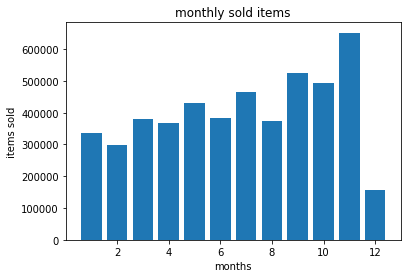

In [174]:
plt.bar(data_quantity["InvoiceMonth"],data_quantity["Quantity"])
plt.title("monthly sold items")
plt.xlabel("months")
plt.ylabel("items sold")
plt.show()

## in november,maximum items were sold

Text(0, 0.5, 'Revenue')

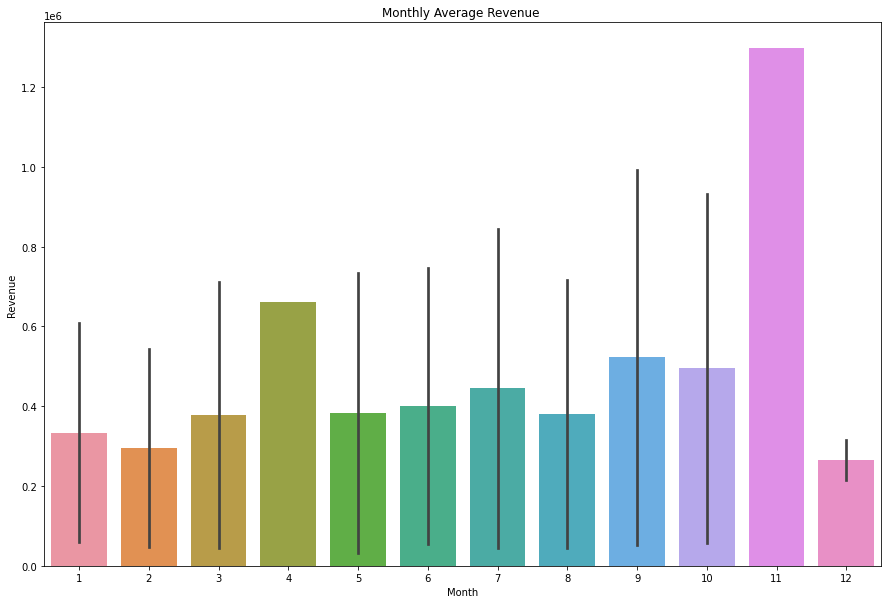

In [175]:
data_revenue_avg=data.groupby(["InvoiceMonth", "InvoiceYear"])["Revenue"].mean().reset_index()
plt.figure(figsize=(15,10))
sns.barplot(x="InvoiceMonth", y="Revenue", data=data_revenue)
plt.title("Monthly Average Revenue ")
plt.xlabel("Month")
plt.ylabel("Revenue")       

In [176]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'InvoiceMonth', 'InvoiceYear',
       'Revenue'],
      dtype='object')

## Correlation Matrix

In [0]:
data_corr = data.corr()

In [178]:
data_corr

,Quantity,UnitPrice,CustomerID,InvoiceMonth,InvoiceYear,Revenue
Quantity,1.000000,-0.001235,-0.003600,-0.000702,0.002001,0.886681
UnitPrice,-0.001235,1.000000,-0.004560,-0.000917,-0.004586,-0.162029
CustomerID,-0.003600,-0.004560,1.000000,0.006547,-0.035955,-0.002274
InvoiceMonth,-0.000702,-0.000917,0.006547,1.000000,-0.119973,0.000226
InvoiceYear,0.002001,-0.004586,-0.035955,-0.119973,1.000000,0.000275
Revenue,0.886681,-0.162029,-0.002274,0.000226,0.000275,1.000000


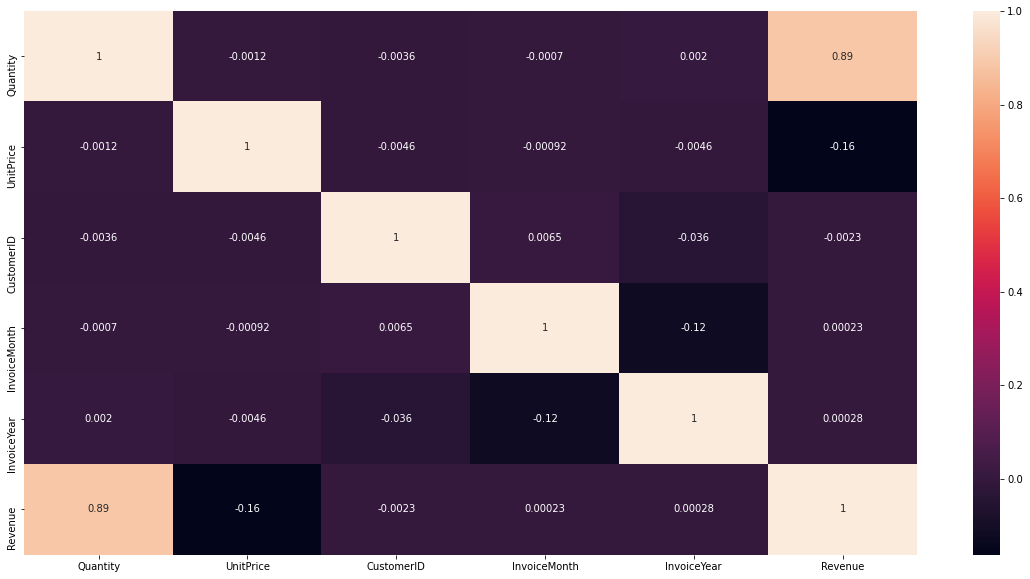

In [179]:
plt.figure(figsize=(20,10))
sns.heatmap(data_corr,annot=True)
plt.show()

### Converting "country" into one hot vector

In [180]:
data.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [181]:
counts=data.Country.value_counts()
counts

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [0]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data["Country"] = labelencoder.fit_transform(data["Country"])

In [183]:
data["Country"].unique()

array([36, 13,  0, 24, 14, 25, 10, 33, 31, 26, 27, 19,  3, 22, 20, 17,  6,
        9,  7, 32,  1, 18, 12,  2, 15, 16, 30, 21, 35, 29,  8,  5, 37,  4,
       34, 11, 23, 28])

Again finding Correlation Matrix

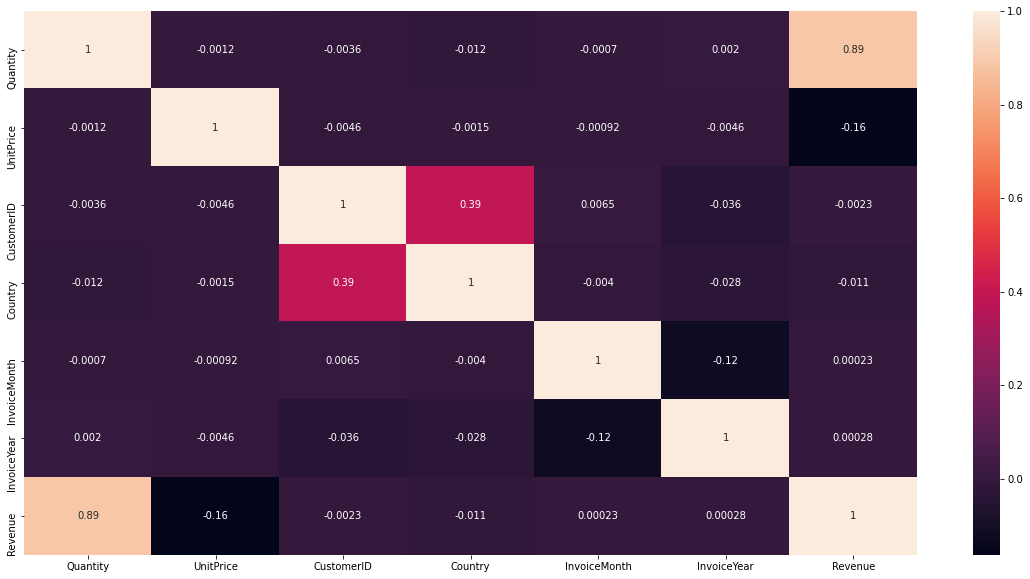

In [184]:
data_corr = data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(data_corr,annot=True)
plt.show()